1. Create a script and save it following the format  Pr6_nameLastname.py. You will write your code for the next numerals in this script.
2. In the folder AVAC>Datasets>FotosPr6 you will find two pictures. Save them and “read” them using imread.
3. Transform the photo named ”ups” into a grayscale image matrix you will call ”P_ups”.

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

P_ups = cv.imread("/home/will/Documentos/computer-vision/practices/images/ups.jpeg", cv.IMREAD_GRAYSCALE)

4. Extract the neighbourhood of pixel P<sub>36,113</sub>(the 8 adjacent pixels plus itself). This is a 3 × 3 matrix, which you will call ”N1”.

In [19]:
N1 = P_ups[35:38, 112:115]
N1

array([[254, 254, 254],
       [254, 254, 254],
       [255, 255, 255]], dtype=uint8)

5. Write a function ”myFilter(N,F)”, which takes a neighbourhood N and a filter kernel F and returns a number x, type double, that results from applying the operation for convolution to the neighbourhood N with filter F.

In [15]:
def myFilter(N, F):
    F = np.flip(F)
    px = np.multiply(F, N).sum()
    return px

6. Call your function myFilter from the script, passing as arguments the neighbourhood N1 and the following filter F1. What is the value returned by the function?

In [18]:
F1 = np.array([
    [1, 2, -3],
    [-2, 3, 4],
    [3, 4, -5]
])

F1_px = myFilter(N1, F1)
F1_px


1778

7. Write a function ”myConvolution(P,F)”, which takes an image matrix P and a filter F and applies convolution to the entire image, using zero padding. The resulting matrix must be of class uint8, even though during the intermediate steps inside this function you should work with type double matrices.

In [20]:
def myConvolution(P, F):
    X = np.empty(P.shape)
    P_padd = np.pad(P, 1)
    rows, cols = P.shape
    for i in range(1, rows+1):
        for j in range(1, cols+1):
            N = P_padd[i-1: i+2, j-1:j+2]
            X[i-1, j-1] = myFilter(N, F)
    return X

8. Apply your function myConvolution on the image matrix P_ups you obtained in numeral 3. Use as filter the following matrix F2:

In [26]:
F2 = 1/9 * np.ones((3, 3))
F2

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [24]:
img_conv = myConvolution(P_ups, F2)
img_conv

array([[111.55555556, 167.33333333, 167.33333333, ...,  58.88888889,
         47.77777778,  27.33333333],
       [167.55555556, 251.33333333, 251.33333333, ...,  79.88888889,
         65.        ,  37.        ],
       [168.        , 252.        , 252.        , ...,  69.88888889,
         58.33333333,  33.77777778],
       ...,
       [ 48.66666667,  73.        ,  73.        , ...,  99.88888889,
         99.        ,  65.66666667],
       [ 48.66666667,  73.        ,  73.        , ...,  97.66666667,
         96.66666667,  64.11111111],
       [ 32.44444444,  48.66666667,  48.66666667, ...,  64.33333333,
         63.66666667,  42.22222222]])

9. Create a function ”myCollage(n_rows, n_col, im1, im2)”, which takes two image matrices im1 and im2, both of the same dimensions, and returns an image matrix X which will show both images in a collage. This collage can show the images either in a horizontal way (n_rows=1, n_col=2) or in a vertical way (n_rows=2, n_col=1.)

In [22]:
def myCollage(nrows, ncols, im1, im2):
    plt.figure()
    plt.subplot(nrows, ncols, 1)
    plt.imshow(im1, cmap='gray')
    plt.subplot(nrows, ncols, 2)
    plt.imshow(im2, cmap='gray')
    plt.show()

10. Use you function myCollage to create a vertical collage of both the original P_ups image and the filtered image obtained in numeral 8. Visualise the result using imshow. Note the blurring effect that filter F2 has had over the image.

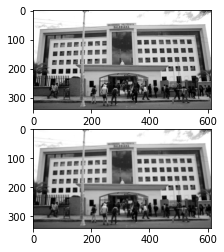

In [25]:
myCollage(2, 1, P_ups, img_conv)

11. Use your function myConvolution to apply the Prewitt filters Fx and Fy on the image matrix P_ups you obtained in numeral 3. Show the results in a vertical collage. Note how Fx highlights the vertical edges and Fy the horizontal ones. These filters are the following:

In [27]:
Fx = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

Fy = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])

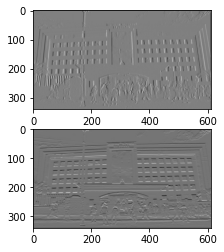

In [29]:
conv_x = myConvolution(P_ups, Fx)
conv_y = myConvolution(P_ups, Fy)

myCollage(2, 1, conv_x, conv_y)

12. Create a function ”myEdgeDetector(P,thresh)”, which will perform a basic edge detection on image matrix P . The type of the matrix returned must be uint8. For attaining this basic edge detection, do the following: (a) Apply the Prewitt filters Fx and Fy on the image. (b) Sum the two matrices obtained in the previous step. (c) Apply the operation threshold on the resulting matrix, using thresh as threshold. (NOTE: thresh must be a number between 0 and 1 for im2bw to work properly.)

In [28]:
def myEdgeDetector(P, thresh):
    Px = myConvolution(P, Fx)
    Py = myConvolution(P, Fy)
    X = Px + Py
    rows, cols = X.shape
    for i in range(rows):
        for j in range(cols):
            X[i, j] = 255 if X[i, j] > thresh * 255 else 0
    return X

13. Use your function myEdgeDetector to detect edges in the photo named ”sanFrancisco” (which is in your folder Photos Pr20.) Do this with thresholds 0.2 and 0.7, and visualise the results in a horizontal collage.

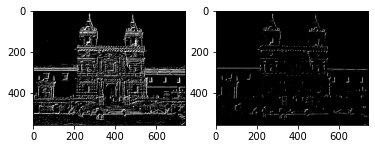

In [30]:
P_SF = P_ups = cv.imread("/home/will/Documentos/computer-vision/practices/images/sanFrancisco.jpg", cv.IMREAD_GRAYSCALE)
edge1 = myEdgeDetector(P_SF, 0.2)
edge2 = myEdgeDetector(P_SF, 0.7)

myCollage(1, 2, edge1, edge2)